In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
link="/content/drive/MyDrive/SHAPEFILE/MAPA6362.gpkg"
!pip install fiona geopandas
import geopandas as gpd
from  fiona import listlayers
listlayers(link)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 95.0 MB/s eta 0:00:00


['México',
 'Estados de México',
 'Municipios de México',
 'Ríos de México',
 'Estados_de_México',
 'Municipalidades_de_México',
 'aeropuerto',
 'Aereopuertos de Mexico',
 'aaeropuertointento']

In [ ]:
Mexico=gpd.read_file(link,layer='México')
Estados=gpd.read_file(link,layer='Estados de México')
Municipios=gpd.read_file(link,layer='Municipios de México')
Rios=gpd.read_file(link,layer='Ríos de México')
Aeropuerto=gpd.read_file(link,layer='aaeropuertointento')

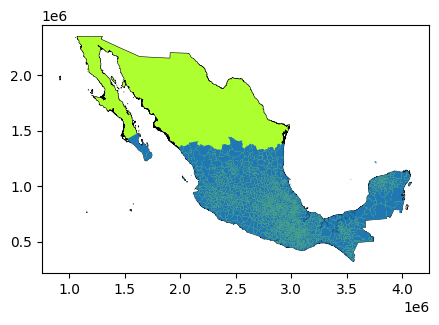

In [ ]:
import matplotlib.pyplot as plt
base = Mexico.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5)) #ponemos como mapa base a Mexico
#podemos a nuestro pais como base

centroid=Mexico.centroid.iloc[0] #identificamos el centroide
Municipios.cx[:, :centroid.y].plot(ax=base) #los municipios debajo del centroide

plt.show()

<Axes: >

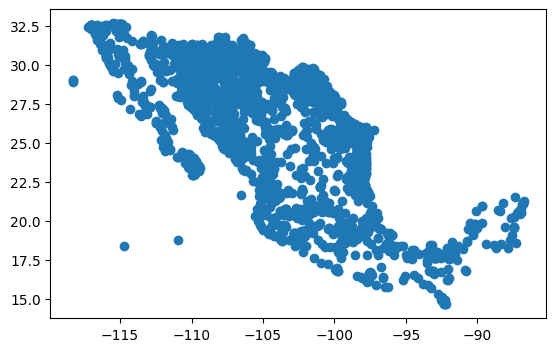

In [ ]:
Aeropuerto.plot() #aeropuertos de México

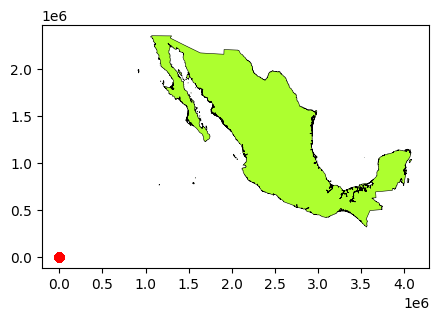

In [ ]:
import matplotlib.pyplot as plt
base = Mexico.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5)) #ponemos como mapa base a Mexico
#podemos a nuestro pais como base

centroid=Mexico.centroid.iloc[0] #identificamos el centroide
Aeropuerto.cx[:, :centroid.y].plot(ax=base, color='red') #los aeropuertos debajo del centroide

plt.show()

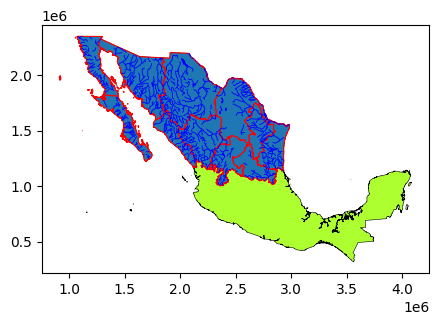

In [ ]:
#Vamos a la siguiente parte
import matplotlib.pyplot as plt
base = Mexico.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5)) #ponemos como mapa base a Mexico
#podemos a nuestro pais como base

centroid=Mexico.centroid.iloc[0] #identificamos el centroide
estados_centroide=Estados.cx[:, centroid.y:] #los estados encima del centroide
estados_centroide.plot(ax=base, edgecolor='red', linewidth=0.8)

clipped_Rios_=gpd.clip(Rios, estados_centroide)# Recortamos los ríos que estan sobre los estados que estan encima del centroide
clipped_Rios_.plot(ax=base, color='blue', linewidth=0.6)#lo graficamos

plt.show()